## NLP Sentiment classification

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pckl
import seaborn as sns
sns.set_theme()

In [2]:
database = pckl.load(open('data_query.p', 'rb'))

## Exploration

In [3]:
database.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target,q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_confidence,q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet,q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet_confidence,orig_golden,internal_id,orig_q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target,q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_gold,orig_q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet,target,tweet,tweet_id
0,713632888,True,golden,30,None,AGAINST: We can infer from the tweet that the ...,0.6581,2. The tweet does NOT expresses opinion about ...,0.4976,True,189,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,Thank you for another day of life Lord. #Chris...,id588718177095266305
1,713632889,False,golden,2,None,NONE OF THE ABOVE: There is no clue in the twe...,1.0000,2. The tweet does NOT expresses opinion about ...,0.5294,True,190,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,@rosaryrevival Lovely to use Glorious Mysterie...,id592798858725425152
2,713632890,True,golden,26,None,AGAINST: We can infer from the tweet that the ...,0.8859,1. The tweet explicitly expresses opinion abo...,0.8820,True,207,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,@Niall250 good thing is that #DUP have consist...,id593472619208380419
3,713632891,False,golden,3,None,AGAINST: We can infer from the tweet that the ...,0.6323,1. The tweet explicitly expresses opinion abo...,0.6323,True,211,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,"So, you tell me... is murder okay if the victi...",id592699132399194112
4,713632892,True,golden,31,None,AGAINST: We can infer from the tweet that the ...,0.8920,1. The tweet explicitly expresses opinion abo...,0.8939,True,213,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,@HillaryClinton Don't you mean to say (all chi...,id588527665365188608


In [4]:
database.shape

(1159, 17)

In [5]:
database.describe(include= 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unit_id,1159,NaN,NaN,NaN,7.13633e+08,335.487,7.13633e+08,7.13633e+08,7.13633e+08,7.13634e+08,7.13634e+08
golden,1159,2,False,1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unit_state,1159,2,finalized,1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trusted_judgments,1159,NaN,NaN,NaN,8.96635,4.79184,2,8,8,8,38
last_judgment_at,1090,152,2015-05-03T02:29:00,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target,1159,4,AGAINST: We can infer from the tweet that the ...,483,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_confidence,1159,NaN,NaN,NaN,0.78027,0.195433,0.2575,0.6225,0.8143,1,1
q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet,1159,3,1. The tweet explicitly expresses opinion abo...,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet_confidence,1159,NaN,NaN,NaN,0.721863,0.195343,0.3732,0.51715,0.7407,0.88275,1
orig_golden,69,1,True,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
database.columns

Index(['unit_id', 'golden', 'unit_state', 'trusted_judgments',
       'last_judgment_at',
       'q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target',
       'q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_confidence',
       'q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet',
       'q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet_confidence',
       'orig_golden', 'internal_id',
       'orig_q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target',
       'q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_gold',
       'orig_q2_which_of_the_options_below_is_true_about_the_opinion_in_the_twe

In [7]:
#Targets
print(database['target'].unique())

['Legalization of Abortion' 'Hillary Clinton' 'Feminist Movement'
 'Atheism']


In [8]:
#Answers to Q1
print(database['q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target'].unique())
print(database['q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_confidence'].describe())

['AGAINST: We can infer from the tweet that the tweeter is against the target (e.g., directly or indirectly by opposing or criticizing someone/something, by supporting someone/something opposed to the target, or by echoing the stance of somebody else).'
 'NONE OF THE ABOVE: There is no clue in the tweet to reveal the stance of the tweeter towards the target (support/against/neutral).'
 'FOR: We can infer from the tweet that the tweeter supports the target (e.g., directly or indirectly by supporting someone/something, by opposing or criticizing someone/something opposed to the target, or by echoing the stance of somebody else).'
 'NEUTRAL: We can infer from the tweet that the tweeter has a neutral stance towards the target. (The tweet being neither favorable nor against the target is not sufficient reason for choosing this option. One reason for choosing this option is that the tweeter supports the target entity to some extent, but is also against it to some extent.)']
count    1159.000

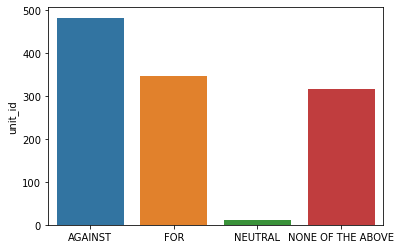

In [9]:
sns.barplot(y=database.groupby(by='q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target').count().transpose().iloc[0,:], x=['AGAINST', 'FOR', 'NEUTRAL', 'NONE OF THE ABOVE'])

In [10]:
#Answers to Q2
print(database['q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet'].unique())
print(database['q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet_confidence'].describe())

['2. The tweet does NOT expresses opinion about the target but it HAS opinion about something or someone other than the target.'
 '1.  The tweet explicitly expresses opinion about the target, a part of the target, or an aspect of the target.'
 '3.  The tweet is not explicitly expressing opinion. (For example, the tweet is simply giving information.)']
count    1159.000000
mean        0.721863
std         0.195343
min         0.373200
25%         0.517150
50%         0.740700
75%         0.882750
max         1.000000
Name: q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet_confidence, dtype: float64


In [11]:
print(database['orig_q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target'].unique())

[None]


In [12]:
database.isna().sum()

unit_id                                                                                                                                                       0
golden                                                                                                                                                        0
unit_state                                                                                                                                                    0
trusted_judgments                                                                                                                                             0
last_judgment_at                                                                                                                                             69
q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target                  0
q1_from_reading_the_tweet_which_of_the_o

In [89]:
database['orig_golden'].unique()

array([True, None], dtype=object)

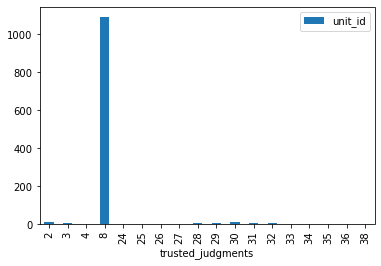

In [64]:
database[['unit_id', 'trusted_judgments']].groupby(by='trusted_judgments').count().plot.bar(y='unit_id')
plt.show()

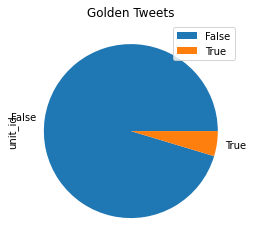

In [72]:
database.groupby(by='golden').count().plot.pie(y='unit_id', label='unit_id')
plt.title('Golden Tweets')
plt.show()

### Clean data

# Word 2 Vec

In [23]:
import nltk
from tqdm import tqdm
from gensim.models import Word2Vec
from multiprocessing import cpu_count
from gensim.models.phrases import Phrases, Phraser
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
nltk.download('punkt')
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

In [27]:
def remove_hashtags(tokens):
    tokens = map(lambda x: x.replace('#', ''), tokens)
    return list(tokens)

def remove_url(tokens):
    tokens = filter(lambda x: "http" not in x, tokens)
    return list(tokens)

def remove_html(tokens):
    tokens = filter(lambda x: x[0]+x[-1] != '<>', tokens)
    return list(tokens)


def tokenize_url_hashtags(corpus, tweets=False):
    if tweets:
        tokenizer = TweetTokenizer()
    else:
        tokenizer = TreebankWordTokenizer()  
    # Life hack : treebank word tokenizer won't keep html code in one token.
    # To preprocess economics news corpus, use tweettokenizer. 
    tokenized_sentences = []
    for sample in tqdm(corpus):
    # separating sentences
        for sentence in sent_detector.tokenize(sample):
            tokens = tokenizer.tokenize(sentence)
            tokens = remove_url(tokens)
            tokens = remove_html(tokens)
            tokens = remove_hashtags(tokens)
            tokens = list(map(lambda x: x.lower(), tokens))
            tokenized_sentences.append(tokens)
    return tokenized_sentences


def clean_corpus(corpus, threshold=50, tweets=False):
    tokenized_sentences = tokenize_url_hashtags(corpus, tweets=tweets)
    phrases = Phrases(tokenized_sentences, threshold=threshold)

  # This lets you use it with less RAM and faster processing.
  # But it will no longer be possible to update the detector with new training 
  # samples
    phraser = Phraser(phrases)

  # Merging multi-word expressions in the tokenization
    clean_corpus = []
    for sentence in tokenized_sentences:
        clean_corpus.append(phraser[sentence])
    return clean_corpus



In [19]:
cleaned_pol = tokenize_url_hashtags(database.tweet.array, tweets=True)
print('number of pol:', len(cleaned_pol))

100%|██████████| 1159/1159 [00:00<00:00, 3277.44it/s]

number of pol: 2134


In [20]:
cpu = cpu_count()
print('The virtual instance has {} cpus, that will be used to train the word2vec model'.format(cpu))

The virtual instance has 4 cpus, that will be used to train the word2vec model


In [21]:
# We will just get the "WordVectors" parameter from the trained Word2Vec model.
# Otherwise, we could continue training with some more exemples that could be
# fed on the fly to the model.
print("Training the political W2V ...")
pol = Word2Vec(cleaned_pol, size=100, window=5, min_count=1, workers=cpu, sg=0)
pol.train(cleaned_pol, total_examples=len(cleaned_pol), epochs=100)
pol_wv = pol.wv

Training the political W2V ...


In [61]:
def tokens2vectors(tokenCorpus, trained_word2vec, dim=100):
    new_sample = list()
    for sample in tokenCorpus:
        tweetVecs = list()
        for token in sample.split(' '):
            try: tweetVecs.append(trained_word2vec.get_vector(token)  )
            except: tweetVecs.append( np.zeros(dim) ) 
        new_sample.append(np.mean(tweetVecs, axis=0))
    return np.array(new_sample)

In [62]:
X = tokens2vectors(database.loc[:, "tweet"], pol_wv)
print(X.shape)
print(len(database.loc[:, "tweet"]))

(1159, 100)
1159


## Trying Kmeans on the data
On tente un kmeans sur les données pour voir si elles sont regroupées en Against / For / Neutral / None Of the Above

In [63]:
from sklearn.cluster import KMeans
# this example uses only 3 initializations to be fast (but less effective!)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=20, max_iter=300, verbose=0).fit(X)

In [64]:
#Prédiction des clusters
from sklearn.cluster import KMeans
# use the model to predict clusters
clusters = kmeans.predict(X)

In [65]:
len(clusters)

1159

In [66]:
X.shape

(1159, 100)

In [67]:
# display some cluster related info
from collections import Counter 
print('Here is the occurrence counts for each cluster:')
for k,v in dict(Counter(clusters)).items(): print('cluster', k, 'has', v, 'elements')

Here is the occurrence counts for each cluster:
cluster 2 has 271 elements
cluster 1 has 378 elements
cluster 0 has 334 elements
cluster 3 has 176 elements


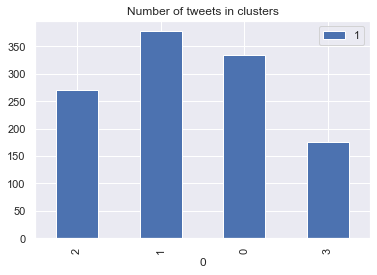

In [82]:
pd.DataFrame.from_dict(dict(Counter(clusters)).items()).plot.bar(y=1, x=0, title='Number of tweets in clusters')
plt.show()

In [87]:
clusterTendancies = {'FOR: We can infer from the tweet that the tweeter supports the target (e.g., directly or indirectly by supporting someone/something, by opposing or criticizing someone/something opposed to the target, or by echoing the stance of somebody else).':list(), 
                     'NONE OF THE ABOVE: There is no clue in the tweet to reveal the stance of the tweeter towards the target (support/against/neutral).': list(),
                     'AGAINST: We can infer from the tweet that the tweeter is against the target (e.g., directly or indirectly by opposing or criticizing someone/something, by supporting someone/something opposed to the target, or by echoing the stance of somebody else).': list(), 
                     'NEUTRAL: We can infer from the tweet that the tweeter has a neutral stance towards the target. (The tweet being neither favorable nor against the target is not sufficient reason for choosing this option. One reason for choosing this option is that the tweeter supports the target entity to some extent, but is also against it to some extent.)':list()}
for text, sentiment, cluster in list(zip(database.loc[:, "tweet"], 
                                         database.loc[:, 'q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target'],
                                         clusters)):
    clusterTendancies[sentiment].append(cluster)
clusterTendancies = { k:Counter(v) for k,v in clusterTendancies.items() }
print('clusters distribution accross sentiments')
print(clusterTendancies)

print(database.loc[:, "tweet"].shape, 'hey', clusters.shape)

clusters distribution accross sentiments
{'FOR: We can infer from the tweet that the tweeter supports the target (e.g., directly or indirectly by supporting someone/something, by opposing or criticizing someone/something opposed to the target, or by echoing the stance of somebody else).': Counter({0: 112, 1: 93, 2: 73, 3: 70}), 'NONE OF THE ABOVE: There is no clue in the tweet to reveal the stance of the tweeter towards the target (support/against/neutral).': Counter({1: 123, 0: 87, 2: 64, 3: 43}), 'AGAINST: We can infer from the tweet that the tweeter is against the target (e.g., directly or indirectly by opposing or criticizing someone/something, by supporting someone/something opposed to the target, or by echoing the stance of somebody else).': Counter({1: 156, 2: 133, 0: 133, 3: 61}), 'NEUTRAL: We can infer from the tweet that the tweeter has a neutral stance towards the target. (The tweet being neither favorable nor against the target is not sufficient reason for choosing this opt

In [88]:
# Quantitative evaluation
from sklearn.metrics.cluster import v_measure_score
label2id = {'FOR: We can infer from the tweet that the tweeter supports the target (e.g., directly or indirectly by supporting someone/something, by opposing or criticizing someone/something opposed to the target, or by echoing the stance of somebody else).':0, 
            'NONE OF THE ABOVE: There is no clue in the tweet to reveal the stance of the tweeter towards the target (support/against/neutral).': 0,
            'AGAINST: We can infer from the tweet that the tweeter is against the target (e.g., directly or indirectly by opposing or criticizing someone/something, by supporting someone/something opposed to the target, or by echoing the stance of somebody else).': 0, 
            'NEUTRAL: We can infer from the tweet that the tweeter has a neutral stance towards the target. (The tweet being neither favorable nor against the target is not sufficient reason for choosing this option. One reason for choosing this option is that the tweeter supports the target entity to some extent, but is also against it to some extent.)':0}
y_true = np.array([ label2id[sentiment] for sentiment in database.loc[:, "q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target"] ])
print('v_measure score:', v_measure_score(y_true, clusters))

v_measure score: 7.401642445572453e-16
